# 1) Delivery_time -> Predict delivery time using sorting time 

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
df.rename(columns = {'Delivery Time':'dt', 'Sorting Time':'st'}, inplace = True)

In [29]:
df.shape

(21, 2)

We have 21 entries, and one independent column 'st', and one dependent column 'dt'

In [27]:
df.st.value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: st, dtype: int64

There are very few unique values for sorting time

In [30]:
df.st.nunique()

9

In [33]:
df.groupby('st').count()

,dt
st,
2,1
3,3
4,3
5,1
6,3
7,4
8,1
9,2
10,3


Some sorting time values have multiple corresponding delivery time values

In [32]:
df.groupby('st').mean()

,dt
st,
2,8.000000
3,11.010000
4,13.043333
5,21.500000
6,16.283333
7,17.905000
8,19.830000
9,21.375000
10,22.633333


This represents the average delivery time for each sorting time. They do not always follow a linear path

<Axes: xlabel='st'>

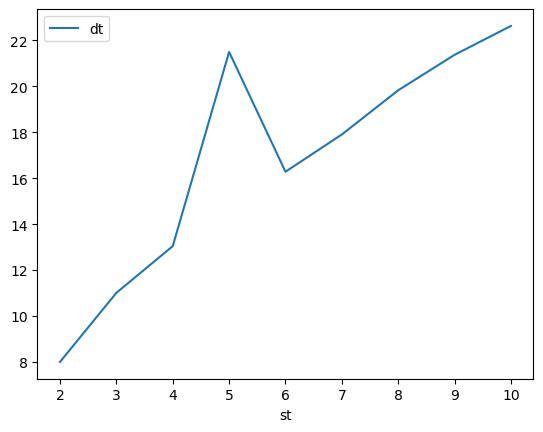

In [35]:
df.groupby('st').mean().plot()

Apart from a spike at 5, it is somewhat linear. We can remove some values from sorting time value 5 as outliers, to improve the relation

In [36]:
df[df.st == 5]

,dt,st
20,21.5,5


However, there is just one entry for sorting time value 5. We'll drop this entry as an outlier

In [38]:
df.drop(index = 20, inplace = True)

<Axes: xlabel='st'>

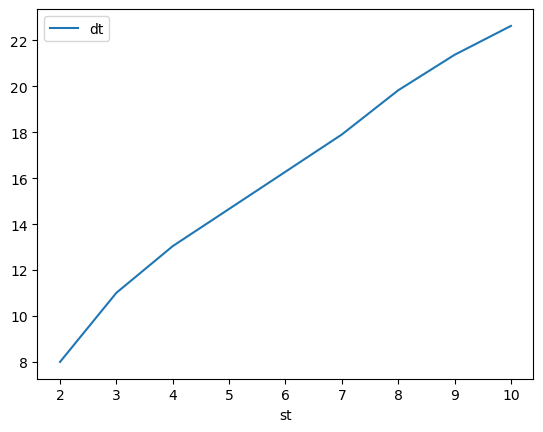

In [40]:
df.groupby('st').mean().plot()

now the curve looks somewhat linear, or rather logarithmic

<Axes: xlabel='st', ylabel='dt'>

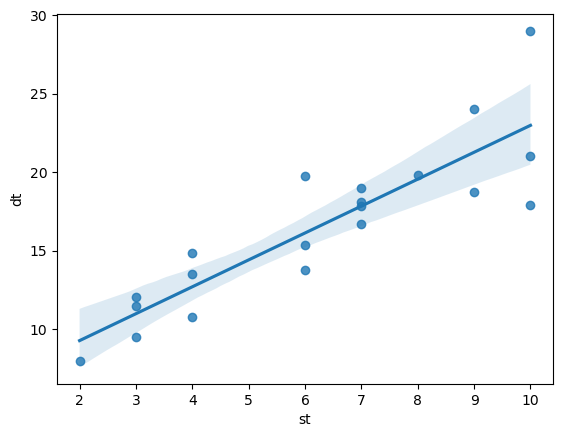

In [42]:
sns.regplot(df, x = 'st', y = 'dt')

In [43]:
df.corr()

,dt,st
dt,1.000000,0.873717
st,0.873717,1.000000


There is high correlation between the two variables

In [44]:
model = LinearRegression()

In [45]:
x = df.st[:,np.newaxis]

C:\Users\harsh\AppData\Local\Temp\ipykernel_9444\219124349.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = df.st[:,np.newaxis]


In [46]:
y = df.dt

In [47]:
model.fit(x,y)

LinearRegression()

In [48]:
model.score(x,y)

0.7633807604442996

accuracy is less as least squared error is high as some sorting time values have multiple values with greater variance

In [51]:
st_grp = df.groupby('st').mean()
st_grp

,dt
st,
2,8.000000
3,11.010000
4,13.043333
6,16.283333
7,17.905000
8,19.830000
9,21.375000
10,22.633333


In [61]:
x = pd.Series(st_grp.index)[:,np.newaxis]

C:\Users\harsh\AppData\Local\Temp\ipykernel_9444\1454713336.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = pd.Series(st_grp.index)[:,np.newaxis]


In [62]:
y = st_grp.dt

In [63]:
model.fit(x,y)

LinearRegression()

In [64]:
model.score(x,y)

0.9912062300025937

This is a very good score. It is not 100% as the line is not exactly linear

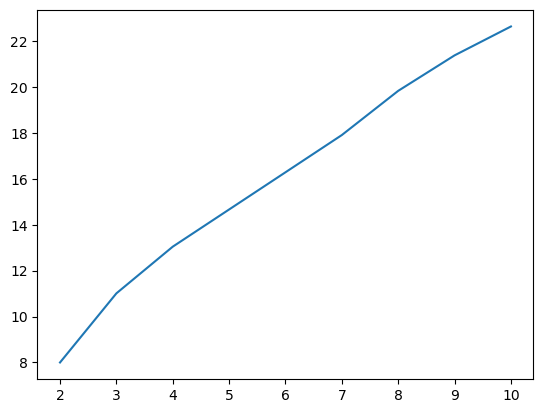

In [65]:
plt.plot(x,y)

In [80]:
ylog = np.log(y)

In [81]:
model.fit(x,ylog)

LinearRegression()

In [82]:
model.score(x,ylog)

0.9459031856460791

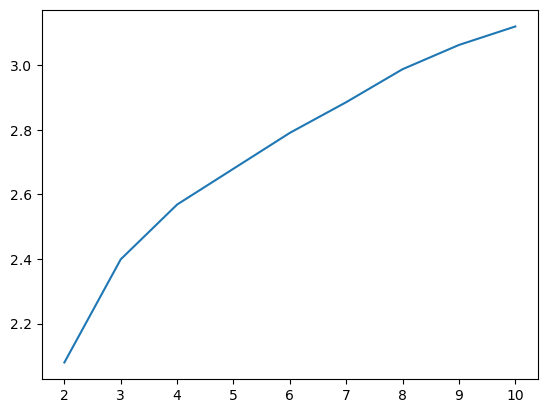

In [83]:
plt.plot(x,ylog)

This turned the curve more logarithmic

In [84]:
xlog = np.log(x)

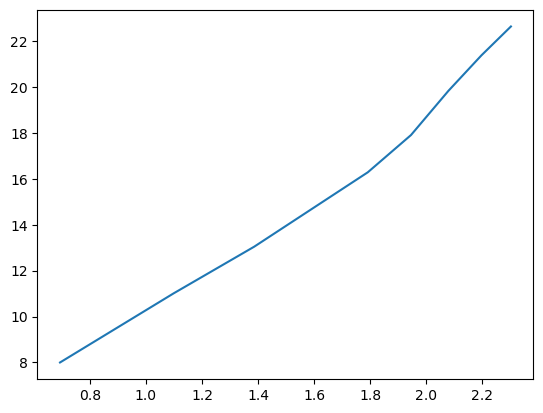

In [89]:
plt.plot(xlog, y)

In [90]:
model.fit(xlog,y)

LinearRegression()

In [91]:
model.score(xlog,y)

0.9839958777177111

better than with log of dependent variable

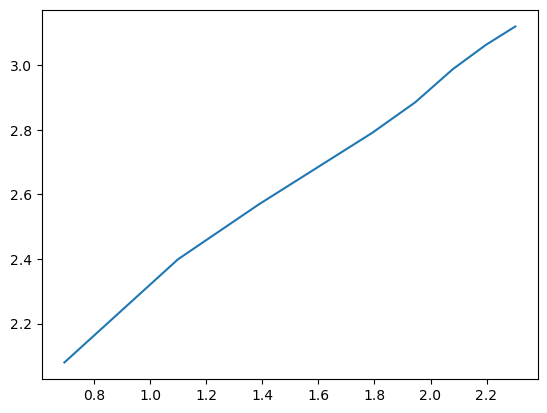

In [92]:
plt.plot(xlog, ylog)

In [93]:
model.fit(xlog,ylog)

LinearRegression()

In [94]:
model.score(xlog,ylog)

0.9968146309534758

This gives the best score

In [95]:
x = df.st[:,np.newaxis]
x = np.log(x)
y = np.log(df.dt)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9444\1490026054.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = df.st[:,np.newaxis]


Lets try applying Linear Regression, without grouping datapoints for each sort time value

In [96]:
model.fit(x,y)

LinearRegression()

In [97]:
model.score(x,y)

0.8338265055164256

Accuracy dropped a lot. It is better than fitting the model on data without log transformation, but quite worst than fitting the model on data grouped by sorting time, averaged, and log transformed

### Best Score:

0.9968146309534758